In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/18Timeseries/ts_simu200.csv')
df = pd.DataFrame(df)
df.head

<bound method NDFrame.head of        t     AR1_a     AR1_b     AR1_c       AR2  ARIMA_110  ARMA_11_a  \
0      1 -1.792035 -0.230986 -0.393871 -0.870515  -2.071533   1.027111   
1      2 -0.743791 -0.708602  0.286157 -0.670041  -2.189523  -0.803688   
2      3  0.644999  0.221065  0.345021  0.148868  -2.305250  -0.759143   
3      4 -0.370990  0.376965 -1.087701 -1.645485  -2.390876   0.019623   
4      5 -0.779197 -0.450217 -0.558108 -0.129383  -1.498416   1.042506   
5      6 -1.335492 -0.715555 -1.520168  0.078636  -0.141718   1.564183   
6      7  0.254865  0.432020  0.641944  1.809483   1.266201   3.245462   
7      8  1.302462  0.961911 -0.305546  0.623024   3.029931   1.792761   
8      9  1.773558 -0.314435 -0.787508  0.423459   4.870304   2.065332   
9     10  0.015395 -1.598287  0.790827  0.909491   6.049094   3.988670   
10    11 -0.529991 -1.912813 -1.240513 -0.875993   4.767016   3.375465   
11    12 -0.123020 -0.321315  0.815747  0.443070   4.617594  -0.423958   
12    13

In [6]:
dates =pd.date_range(start='2017/01/01' , periods=200)
df.set_index(dates,inplace=True)
dts = df['AR1_a']

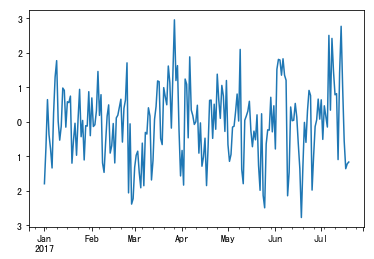

In [8]:
dts.plot()

In [10]:
import statsmodels.api as sm

<Figure size 864x576 with 0 Axes>

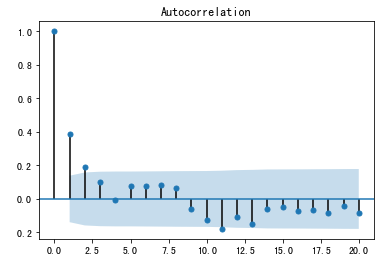

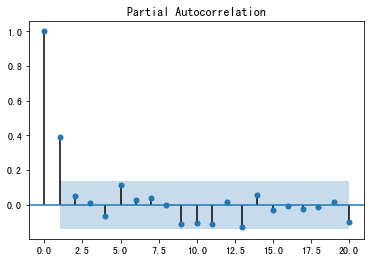

In [13]:
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.tsa.plot_acf(dts , lags = 20)
fig = sm.graphics.tsa.plot_pacf(dts , lags = 20)

In [18]:
import statsmodels.api as sm
ar10 = sm.tsa.ARMA(dts ,(1,0)).fit()

<Figure size 864x576 with 0 Axes>

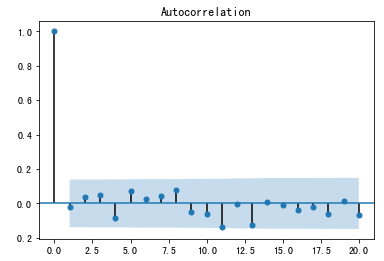

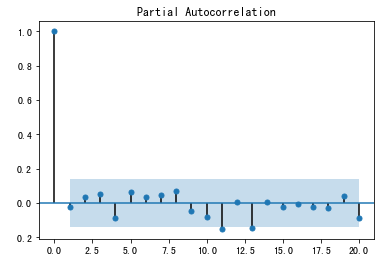

In [19]:
resid = ar10.resid
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze() , lags = 20)
fig = sm.graphics.tsa.plot_pacf(resid , lags = 20)

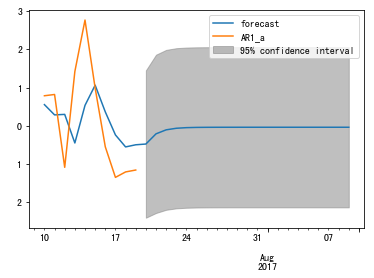

In [22]:
predict = ar10.forecast(steps =5 )
import datetime
fig = ar10.plot_predict(pd.to_datetime('2017/01/01') + datetime.timedelta(days = 190) , pd.to_datetime('2017/01/01') + datetime.timedelta(days = 220),dynamic = False , plot_insample = True)

In [23]:
df.head()

,t,AR1_a,AR1_b,AR1_c,AR2,ARIMA_110,ARMA_11_a,ARMA_11_b,ARMA_22,MA1_a,MA1_b,MA2,EX1_a,EX1_b,EX1_c,EX1_d
2017-01-01,1,-1.792035,-0.230986,-0.393871,-0.870515,-2.071533,1.027111,1.356889,-5.104612,1.951711,-0.519669,-0.095012,0.640405,0.699464,0.389539,0.188441
2017-01-02,2,-0.743791,-0.708602,0.286157,-0.670041,-2.189523,-0.803688,2.027196,-5.997497,0.407913,0.035999,-0.130953,-0.757885,-1.696354,-1.056063,0.405051
2017-01-03,3,0.644999,0.221065,0.345021,0.148868,-2.305250,-0.759143,2.457974,-5.134267,-1.375231,-0.696157,0.580822,-0.891547,2.257708,-1.454561,-1.281526
2017-01-04,4,-0.370990,0.376965,-1.087701,-1.645485,-2.390876,0.019623,3.265816,-3.288555,-0.556760,-1.688884,-0.207664,0.924115,-0.954396,-2.593004,0.771849
2017-01-05,5,-0.779197,-0.450217,-0.558108,-0.129383,-1.498416,1.042506,3.081810,-0.504500,1.539875,-1.897715,1.035279,-0.015784,1.491232,-2.350179,-0.067767


In [ ]:
import tseries

In [25]:
dta = df['ARIMA_110']
df.head()

,t,AR1_a,AR1_b,AR1_c,AR2,ARIMA_110,ARMA_11_a,ARMA_11_b,ARMA_22,MA1_a,MA1_b,MA2,EX1_a,EX1_b,EX1_c,EX1_d
2017-01-01,1,-1.792035,-0.230986,-0.393871,-0.870515,-2.071533,1.027111,1.356889,-5.104612,1.951711,-0.519669,-0.095012,0.640405,0.699464,0.389539,0.188441
2017-01-02,2,-0.743791,-0.708602,0.286157,-0.670041,-2.189523,-0.803688,2.027196,-5.997497,0.407913,0.035999,-0.130953,-0.757885,-1.696354,-1.056063,0.405051
2017-01-03,3,0.644999,0.221065,0.345021,0.148868,-2.305250,-0.759143,2.457974,-5.134267,-1.375231,-0.696157,0.580822,-0.891547,2.257708,-1.454561,-1.281526
2017-01-04,4,-0.370990,0.376965,-1.087701,-1.645485,-2.390876,0.019623,3.265816,-3.288555,-0.556760,-1.688884,-0.207664,0.924115,-0.954396,-2.593004,0.771849
2017-01-05,5,-0.779197,-0.450217,-0.558108,-0.129383,-1.498416,1.042506,3.081810,-0.504500,1.539875,-1.897715,1.035279,-0.015784,1.491232,-2.350179,-0.067767
